In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# load data
data = pd.read_csv("LeagueofLegends.csv")

In [2]:
# preprocess and extract features
# kda ratio
def process_kda(row):
    kda = ast.literal_eval(row)
    kill_count = len(kda)
    return kill_count

# apply function above related to kda ratio from the 'bKills' and 'rKills' column
data['bkills'] = data['bKills'].apply(process_kda)
data['rkills'] = data['rKills'].apply(process_kda)

In [3]:
data['kda_diff'] = data['bkills'] - data['rkills']

# checking abs or infinity values in 'kda_diff'
is_inf = np.isinf(data['kda_diff'].values)
abs_diff = np.abs(data['kda_diff'].values)

# bool mask for larger than threshold
threshold = 100.0
is_large = abs_diff > threshold

data_d = data['kda_diff']
data_d[is_inf], data_d[is_large]

(Series([], Name: kda_diff, dtype: int64),
 Series([], Name: kda_diff, dtype: int64))

Accuracy: 0.9488188976377953


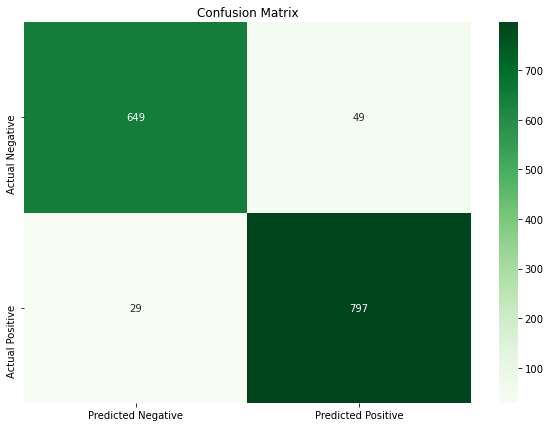

In [4]:
# splitting data to training and test data
X = data['kda_diff'].values.reshape(-1,1)
y = data['bResult']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# normalizing values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# apply random forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# calculate accuracy and create confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(confusion, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Accuracy:", accuracy)

# visualization of confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [6]:
print('Correlation: ' + str(data['bResult'].corr(data['kda_diff'])))
print(classification_report(y_test, y_pred))

Correlation: 0.8530029763370982
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       698
           1       0.94      0.96      0.95       826

    accuracy                           0.95      1524
   macro avg       0.95      0.95      0.95      1524
weighted avg       0.95      0.95      0.95      1524

